In [18]:
import numpy as np
from scipy.linalg import cholesky
from scipy.spatial.distance import squareform
from scipy.stats.stats import pearsonr

def test_data_generation(bl,cn,an):
    block_length = bl
    covariance_num = cn
    activation_num = an
    time_len = block_length * covariance_num
    covariances = np.zeros([covariance_num,activation_num,activation_num])
    activations = np.random.normal(0,10,[activation_num, time_len])
    correlations = np.zeros(covariance_num)
    MSE = np.zeros(covariance_num)

    for i in range(covariance_num):
        temp = np.random.normal(0,1,[activation_num,activation_num])
        covariances[i] = np.dot(temp,temp.T)
#         covariances[i] = covariances[i]/np.max(abs(covariances[i]))
    
#     for i in range(covariance_num):
#         activations[:,(i*block_length):((i+1)*block_length)]=np.dot(cholesky(covariances[i]),activations[:,(i*block_length):((i+1)*block_length)])
    for i in range(time_len):
        activations[:,i] = np.random.multivariate_normal(np.zeros(activation_num),covariances[i/block_length])

    for i in range(covariance_num):
        correlations[i] = pearsonr(squareform(np.corrcoef(activations[:,(i*block_length):((i+1)*block_length)]),checks=False),squareform(covariances[i],checks=False))[0]
        MSE[i]=np.sum(np.square(np.cov(activations[:,(i*block_length):((i+1)*block_length)])-covariances[i]))
    return correlations, MSE


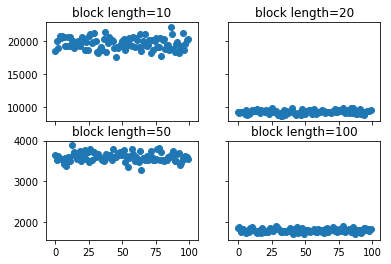

In [16]:
#multivariate Gaussian
import matplotlib.pyplot as plt
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
axis = [ax1,ax2,ax3,ax4]
block_lengths = [10,20,50,100]
covariance_num = 100
activation_num = 20
iterations = 100
# plt.axis((0,100,0,1))
for i in range(len(block_lengths)):
    correlation = np.zeros(covariance_num)
    for j in range(iterations):
        correlation += test_data_generation(block_lengths[i],covariance_num, activation_num)
    correlation = correlation/iterations
    axis[i].scatter(range(covariance_num),correlation)
    axis[i].set_title("block length="+str(block_lengths[i]))



plt.show()

In [ ]:
#cholesky
import matplotlib.pyplot as plt
f, ((ax1, ax5), (ax2, ax6), (ax3, ax7), (ax4, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row')
axis1 = [ax1,ax2,ax3,ax4]
axis2 = [ax5,ax6,ax7,ax8]
block_lengths = [10,100,500,1000]
covariance_num = 100
activation_num = 20
iterations = 100
# plt.axis((0,100,0,1))
for i in range(len(block_lengths)):
    correlation = np.zeros(covariance_num)
    mse = np.zeros(covariance_num)
    for j in range(iterations):
        c_tmp, mse_tmp = test_data_generation(block_lengths[i],covariance_num, activation_num)
        correlation+=c_tmp
        mse+=mse_tmp
    correlation = correlation/iterations
    mse = mse/iterations
    axis1[i].set_ylabel("block length="+str(block_lengths[i]))
    axis1[i].scatter(range(covariance_num),correlation)
    axis1[i].set_title("correlation")
    axis2[i].scatter(range(covariance_num),mse)
    axis2[i].set_title("MSE")
plt.show()